In [2]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()



--2024-08-17 04:06:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 74.125.199.207, 172.253.117.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   167MB/s    in 0.6s    

2024-08-17 04:06:28 (167 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
# now its time to analyze our dataset
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

In [6]:
# way to find how many images are in a file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [7]:
num_pizza_images_train=len(os.listdir("pizza_steak/train/pizza"))
num_pizza_images_train

750

In [8]:
# how to get classnames programatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [9]:
# visualizing our random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [10]:
def view_random_image(target_dir,target_class):
 target_folder = os.path.join(target_dir, target_class)
 random_image=random.sample(os.listdir(target_folder),1)
 img = mpimg.imread(target_folder + "/" + random_image[0])
 plt.imshow(img)
 plt.title(target_class)
 plt.axis("off");

 print(f"Image shape: {img.shape}") # show the shape of the image
 return img

Image shape: (512, 512, 3)


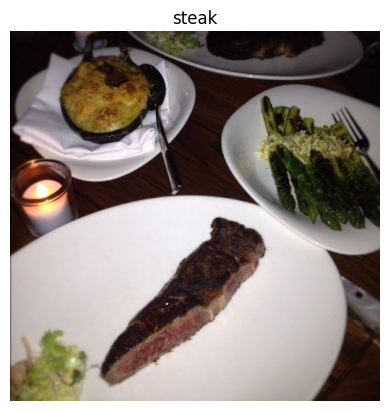

In [11]:
img = view_random_image(target_dir="pizza_steak/train/",target_class="steak")

array([[[ 10,   5,   9],
        [ 13,   8,  12],
        [ 16,  11,  15],
        ...,
        [ 15,   6,   7],
        [ 12,   6,   6],
        [ 12,   6,   6]],

       [[ 11,   6,  10],
        [ 13,   8,  12],
        [ 16,  11,  15],
        ...,
        [ 13,   4,   5],
        [ 11,   5,   5],
        [ 11,   5,   5]],

       [[ 11,   6,  10],
        [ 14,   9,  13],
        [ 16,  11,  15],
        ...,
        [ 11,   5,   5],
        [ 11,   5,   5],
        [ 11,   5,   5]],

       ...,

       [[ 66,  46,  19],
        [ 81,  60,  33],
        [ 96,  72,  46],
        ...,
        [ 24,  10,   7],
        [ 24,  10,   7],
        [ 24,  10,   7]],

       [[ 66,  46,  19],
        [ 83,  62,  35],
        [ 98,  74,  48],
        ...,
        [ 24,  10,   9],
        [ 24,  10,   9],
        [ 24,  10,   9]],

       [[ 68,  48,  21],
        [ 84,  63,  36],
        [100,  76,  50],
        ...,
        [ 25,  11,  10],
        [ 24,  10,   9],
        [ 24,  10,   9]]], dtype=uint8)
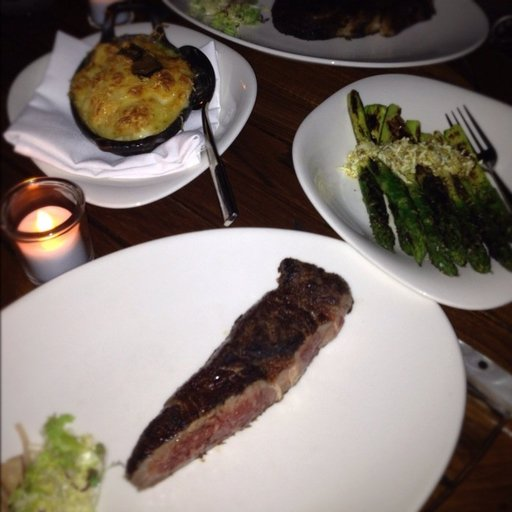

In [12]:
img

In [13]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 10,   5,   9],
        [ 13,   8,  12],
        [ 16,  11,  15],
        ...,
        [ 15,   6,   7],
        [ 12,   6,   6],
        [ 12,   6,   6]],

       [[ 11,   6,  10],
        [ 13,   8,  12],
        [ 16,  11,  15],
        ...,
        [ 13,   4,   5],
        [ 11,   5,   5],
        [ 11,   5,   5]],

       [[ 11,   6,  10],
        [ 14,   9,  13],
        [ 16,  11,  15],
        ...,
        [ 11,   5,   5],
        [ 11,   5,   5],
        [ 11,   5,   5]],

       ...,

       [[ 66,  46,  19],
        [ 81,  60,  33],
        [ 96,  72,  46],
        ...,
        [ 24,  10,   7],
        [ 24,  10,   7],
        [ 24,  10,   7]],

       [[ 66,  46,  19],
        [ 83,  62,  35],
        [ 98,  74,  48],
        ...,
        [ 24,  10,   9],
        [ 24,  10,   9],
        [ 24,  10,   9]],

       [[ 68,  48,  21],
        [ 84,  63,  36],
        [100,  76,  50],
        ...,
        [ 25,  11,  1

In [14]:
# view the shape of img
img.shape   # that's gives the height,width,3 different colour channel

(512, 512, 3)

In [15]:
img.max(),img.min()

(255, 0)

In [16]:
img=img/255

In [17]:
img.max()

1.0

In [18]:
img

array([[[0.03921569, 0.01960784, 0.03529412],
        [0.05098039, 0.03137255, 0.04705882],
        [0.0627451 , 0.04313725, 0.05882353],
        ...,
        [0.05882353, 0.02352941, 0.02745098],
        [0.04705882, 0.02352941, 0.02352941],
        [0.04705882, 0.02352941, 0.02352941]],

       [[0.04313725, 0.02352941, 0.03921569],
        [0.05098039, 0.03137255, 0.04705882],
        [0.0627451 , 0.04313725, 0.05882353],
        ...,
        [0.05098039, 0.01568627, 0.01960784],
        [0.04313725, 0.01960784, 0.01960784],
        [0.04313725, 0.01960784, 0.01960784]],

       [[0.04313725, 0.02352941, 0.03921569],
        [0.05490196, 0.03529412, 0.05098039],
        [0.0627451 , 0.04313725, 0.05882353],
        ...,
        [0.04313725, 0.01960784, 0.01960784],
        [0.04313725, 0.01960784, 0.01960784],
        [0.04313725, 0.01960784, 0.01960784]],

       ...,

       [[0.25882353, 0.18039216, 0.0745098 ],
        [0.31764706, 0.23529412, 0.12941176],
        [0.37647059, 0

**BUILDING AN END TO END CNN MODEL**

Steps in modelling for binary image classification with CNNs

1. Becoming one with the data

2. Preparing data for modelling
3. Creating a CNN model (starting with a baseline)
4. Fitting a model (getting it to find patterns in our data)
5. Evaluating a model
6. Improving a model
7. Making a prediction with a trained model

In [19]:
#  end to end cnn model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# setting a random seed
tf.random.set_seed(42)


# processing data so they gets in range of 0 to 1...that's called scaling /normalizing

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup the train and test directory
train_dir="/content/pizza_steak/train/"

test_dir="/content/pizza_steak/test/"

# import data from directories and make it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(test_dir,
                                                  batch_size=32,
                                                  target_size=(224,224),
                                                  class_mode="binary",
                                                  seed=42)

# create a cnn model
model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(20,3,activation='relu'),
    tf.keras.layers.Conv2D(20,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compiling our model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fitting our model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data)  # Provide validation_data or validation_split



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 291ms/step - accuracy: 0.5710 - loss: 0.7420 - val_accuracy: 0.8000 - val_loss: 0.4536
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8000 - val_loss: 0.4536
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 142ms/step - accuracy: 0.7601 - loss: 0.5072 - val_accuracy: 0.8280 - val_loss: 0.3953
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8280 - val_loss: 0.3953
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.8061 - loss: 0.4335 - val_accuracy: 0.8480 - val_loss: 0.3614


**MAKING A MODEL 2 FITTING OUR FOOD 101 DATA TO PREVIOUS MODEL**

In [20]:
# setting random seeds
tf.random.set_seed(42)

# creating our model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# compiling our model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fitting our model
model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - accuracy: 0.4802 - loss: 0.8145 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.4735 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.4741 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


**MODEL 3**

In [21]:
# setting random seeds
tf.random.set_seed(42)

# creating our model
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# compiling our model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fitting our model
model_2.fit(train_data,
           epochs=5,
           steps_per_epoch=len(train_data), # steps_per_epochs=len(train_data)/
                                            #                        batch_size
           validation_data=valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.5079 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.5053 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.4966 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [22]:
len(train_data)/32

1.46875

**VISUALZING OUR DATA**

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


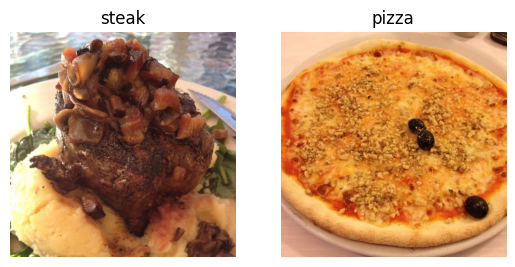

In [23]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")



# PREPROCESSING OUR DATA  (Preparing for it our model)

In [24]:
# setting up directories for our train and test data
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

# create a train and test data generator and rescaling our data
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
train_datagen=idg(rescale=1/225)
test_datagen=idg(rescale=1/225)

# loads our images from directories and convert into the batches.
train_data=train_datagen.flow_from_directory(directory=train_dir,    # working with data directory
                                             target_size=(224,224),  # target size of img (height,width)
                                             class_mode='binary',    # working with 2 classes
                                             batch_size=32)          # size of mini batches loads into our data
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
len(train_data)

47

In [26]:
1500/32


46.875

In [27]:
# Get a sample of the training data batch
images, labels = next(train_data) # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [28]:
# get first two images
images[:2],images[0].shape

(array([[[[0.63555557, 0.72      , 0.8977778 ],
          [0.64      , 0.72444445, 0.9022222 ],
          [0.64      , 0.72444445, 0.9111111 ],
          ...,
          [0.08888889, 0.09333333, 0.06666667],
          [0.09333333, 0.09333333, 0.08444445],
          [0.11111111, 0.11111111, 0.11111111]],
 
         [[0.64      , 0.72444445, 0.9022222 ],
          [0.63111115, 0.71555555, 0.9022222 ],
          [0.63111115, 0.71555555, 0.9022222 ],
          ...,
          [0.11111111, 0.11555555, 0.08      ],
          [0.07111111, 0.07555556, 0.05333333],
          [0.04888889, 0.04888889, 0.04      ]],
 
         [[0.64444447, 0.7288889 , 0.9155556 ],
          [0.64      , 0.72444445, 0.9111111 ],
          [0.64      , 0.72444445, 0.9155556 ],
          ...,
          [0.08444445, 0.08888889, 0.05333333],
          [0.17777778, 0.18222223, 0.15555556],
          [0.24444444, 0.2488889 , 0.22666667]],
 
         ...,
 
         [[0.44444445, 0.39555556, 0.25333333],
          [0.44888

## create a CNN model---we can start with a base line

a baseline is a relatively simple and existing result that you have setup when beginnning a machine learning experiment

In [29]:
# setting random seed
tf.random.set_seed(42)

# creating a model
model_3=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           padding="valid",
                           strides=1,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# time for compiling a model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# time for fitting the model
history_4=model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - accuracy: 0.6107 - loss: 0.8945 - val_accuracy: 0.8320 - val_loss: 0.3929
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8320 - val_loss: 0.3929
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - accuracy: 0.8269 - loss: 0.4063 - val_accuracy: 0.8480 - val_loss: 0.3580
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8480 - val_loss: 0.3580
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.8813 - loss: 0.2950 - val_accuracy: 0.8380 - val_loss: 0.3633


# EVALUATION OF A MODEL

In [30]:
import pandas as pd

In [22]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

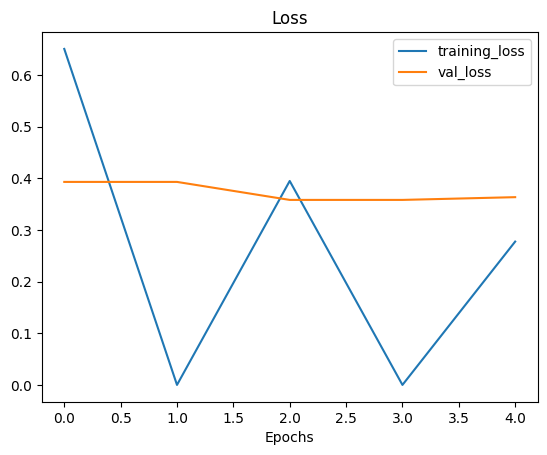

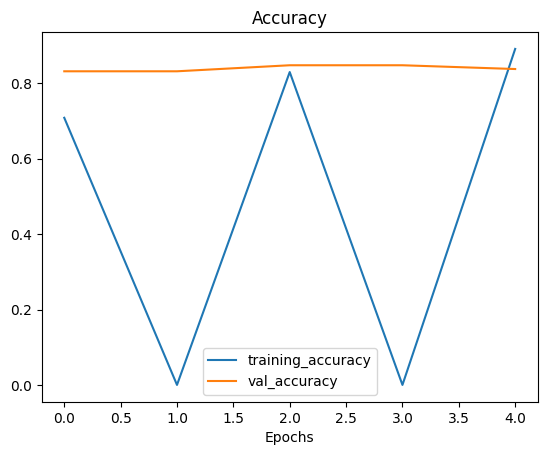

In [32]:
plot_loss_curves(history_4)

# ADJUST THE PARAMETER OF A MODEL

Fitting a machine learning model comes in 3 steps:
1. Create a basline.

2. Beat the baseline by overfitting a larger model.
3. Reduce overfitting.

So far we've gone through steps 0 and 1.

ways to **induce overfitting** :
1. Increase the number of convolutional layers.
2. Increase the number of convolutional filters.
3. Add another dense layer to the output of our flattened layer.

**reduce overfitting:**

1. **data augmentation**
2. add **regularization layer** (MaxPool2D)
3. add more **data**

# what is regularization?
ans- Reducing overfitting is also known as regularization

In [33]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

### what is DATA AUGMENTATION ?
**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [34]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [35]:
# setting random seed
tf.random.set_seed(42)

# creating a model
model_4=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           padding="valid",
                           strides=1,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# time for compiling a model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# time for fitting the model
history_4=model_4.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=valid_data)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 456ms/step - accuracy: 0.4969 - loss: 3.5957 - val_accuracy: 0.5720 - val_loss: 0.6505
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5720 - val_loss: 0.6505
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 473ms/step - accuracy: 0.6215 - loss: 0.7174 - val_accuracy: 0.7500 - val_loss: 0.6575
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.6575
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 452ms/step - accuracy: 0.6353 - loss: 0.6644 - val_accuracy: 0.7540 - val_loss: 0.5380


# Download an image and make a prediction on your own image data...wheather it is steak or pizza

--2024-08-17 04:10:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2024-08-17 04:10:40 (47.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

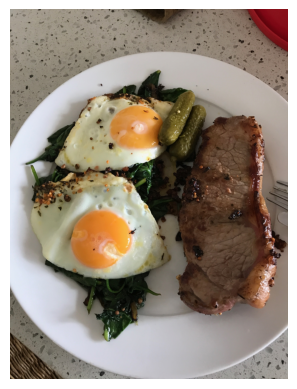

In [36]:
# view our example image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak=mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [37]:
steak.shape

(4032, 3024, 3)

In [38]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

#   **create a function that accept image and convert into a tensor and reshape into the desired shape**

In [42]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [44]:
steak=load_and_prep_image("03-steak.jpeg")

In [46]:
steak.shape

TensorShape([224, 224, 3])

In [57]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [58]:
pred=model_4.predict(tf.expand_dims(steak,axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [59]:
pred

array([[0.64918584]], dtype=float32)

# Getting class name instead of their class prediction probability

In [60]:
class_pred=class_names[int(tf.round(pred))]

In [61]:
class_pred

'steak'

##  **MULTICLASS IMAGE CLASSIFICATION PROBLEM IN CNN MODEL**

# Steps:
1. Become one with a data.
2. preprocess the data. (get it ready for a model)
3. create a model.
4. fit the model
5. evaluate the model.
6. adjust different hyperparameter and imporve the model.
7. Repeat untill statisfied


In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-08-17 05:45:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 173.194.203.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  74.5MB/s    in 7.5s    

2024-08-17 05:45:56 (66.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# walk through the 10 classes of food
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [3]:
# setup train and test directories
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [4]:
# getting class names directly
import pathlib
import numpy as np
data_dir=pathlib.Path("10_food_classes_all_data/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [7]:
import random

In [18]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_dir,target_class=random.choice(class_names))
# get a random class name
img

NameError: name 'view_random_image' is not defined

# STEP 2: **PREPROCESS THE DATA**

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

# loads data from directories and turn into batches
train_data=train_datagen.flow_from_directory(directory=train_dir ,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## STEP3: **CREATING A MODEL** & **COMPILING OUR MODEL**

In [14]:
import tensorflow as tf

#creating our model

model_5=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")
])

#compiling our model
model_5.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# STEP4: **FITTING OUR MODEL**

In [20]:
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 582s 2s/step - accuracy: 0.3216 - loss: 1.9498 - val_accuracy: 0.3248 - val_loss: 1.9581
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


235/235 ━━━━━━━━━━━━━━━━━━━━ 59s 252ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3248 - val_loss: 1.9581
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 575s 2s/step - accuracy: 0.4293 - loss: 1.6509 - val_accuracy: 0.3304 - val_loss: 1.9237
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 58s 246ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3304 - val_loss: 1.9237
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 624s 2s/step - accuracy: 0.6296 - loss: 1.1172 - val_accuracy: 0.3140 - val_loss: 2.1946


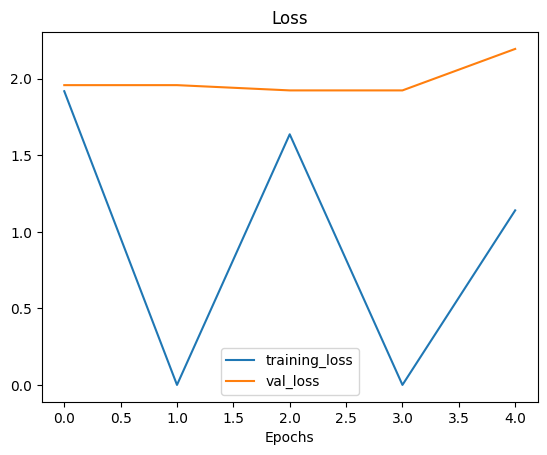

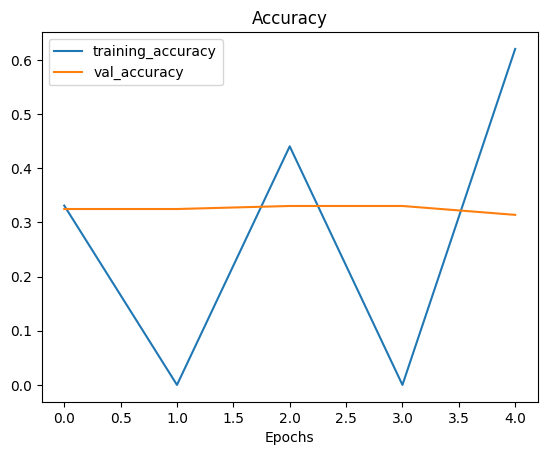

In [24]:
import matplotlib.pyplot as plt
plot_loss_curves(history_5)

 # **ADJUST THE MODEL PARAMETER**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Try a simplified model (removed two layers)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_6.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_6 = model_6.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.1984 - loss: 2.2486 - val_accuracy: 0.2832 - val_loss: 2.0098
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


AttributeError: 'NoneType' object has no attribute 'items'